### Logistic Regression을 python, tensorflow, sklearn으로 각각 구현
logistic curve
>로지스틱 곡선(曲線): 지수 함수라고도 하며, 갖가지 형태의 성장 모델에 쓰이는 S자형 곡선.

In [11]:
# %reset #

# Logistic Regression을 python, tensorflow, sklearn으로 각각 구현
# 독립변수 1개

import numpy as np
import tensorflow as tf
from sklearn import linear_model

####
# 수치미분함수를 들고와서 사용한다.
# 다변수 수치미분코드
def numerical_derivative(f, x):
    # f: 미분하려고 하는 다변수 함수
    # x : 모든 변수를 포함하고 있어야 한다. ndarray (차원 상관 없이)
    
    delta_x = 1e-4
    derivative_x = np.zeros_like(x) # 미분한 결과를 저장하는 ndarray
    
    # iterator를 이용해서 입력변수 x에 대해 편미분을 수행
    it = np.nditer(x, flags=['multi_index'])
    
    while not it.finished:
        idx = it.multi_index # iterator의 현재 index를 추출
        
        tmp = x[idx]           # 현재 idx의 값을 잠시 보존. delta_x를 이용한 값으로
                               # ndarray를 수정한 후 함수값을 계산해야 하기 때문
                               # 함수값을 계산한 후 원상복구해야 다음 변수에 대한 편미분을
                               # 정상적으로 수행할 수 있다.
        x[idx] = tmp + delta_x
        fx_plus_delta = f(x)    # f(x + delta_x)
        
        x[idx] = tmp - delta_x#
        fx_minus_delta = f(x)   # f(x - delta_x)
    
        derivative_x[idx] = (fx_plus_delta - fx_minus_delta) / (2 * delta_x)
        
        x[idx] = tmp # 데이터 원상 복구
        
        it.iternext()
    
    return  derivative_x

############

# 1. Raw Data Loading + Data Preprocessing

# 2. Training Data SEt
# 지도학습을 하고 있기 때문에 독립변수와 종속변수 (label)로 구분해서 데이터를 준비
# 어떤 경우에는 이 두개를 아예 분리해서 제공하는 경우도 있다
x_data = np.arange(2,21,2).reshape(-1,1)
t_data = np.array([0,0,0,0,0,0,1,1,1,1]).reshape(-1,1)

### 1. python 구현

In [5]:
# 3. Weight & bias = > Wx + b
W = np.random.rand(1,1)
b = np.random.rand(1)  # shape -> (1, ) => b.shape[0]로 접근
# 상수 f라서 브로그캐스팅 일어나서 Scalar와 연산 가능

# 위에서 정의한 W와 b값 구하여, 최종 목적인 model 완성하기

# 4. loss function(손실함수, cost function , 비용함수)
# 입력으로 들어온 x_data와 W, b를 이용해서 예측값 계산, t_data 정답과 비교
def loss_func(input_obj):
    # input_obj : W와 b를 같이 포함하고 있는 ndarray => [W1 W2 W3 b]
    num_of_bias = b.shape[0]                                       # num_of_bias : 1
    
    input_W = input_obj[:-1*num_of_bias].reshape(-1, num_of_bias) # 행렬 연산을 하기 위한 W를 생성
    input_b = input_obj[-1*num_of_bias:]                          # bias
    
    # 모델의 예측값 linear regression modeol((Wx + b))  => sigmoid  적용
    z = np.dot(x_data, input_W) + input_b
    y = 1 / (1 + np.exp(-1 * z)) # sigmoid
    
    delta = 1e-7
    # 굉장히 작은 값을 이용해서 프로그램이 로그 연산 시 무한대로 발산하는 것을 방지
    
    # cross entropy
    return -np.sum(t_data*np.log(y+delta) + ((1-t_data)*np.log(1-y+delta)))

# 5. learning rate
learning_rate = 1e-4

# 6. 학습
for step in range(30000):
    
    input_param = np.concatenate((W.ravel(), b.ravel()), axis=0) # [W b] [W1 W2 W3 b]
    derivative_result = learning_rate * numerical_derivative(loss_func, input_param)
    
    num_of_bias = b.shape[0]
    
    W = W - derivative_result[:-1*num_of_bias].reshape(-1, num_of_bias) # [[W1 W2 W3]]
    b = b - derivative_result[-1*num_of_bias:]
    
# 6. predict => W, b를 다 구해서, Logistic Regression Model을 완성
def logistic_predict(x): # 공부한 시간을 입력
    z = np.dot(x, W) + b
    y = 1 / ( 1 + np.exp(-1*z))
    
    if y < 0.5:
        result = 0
    else:
        result = 1
        
    return result, y

study_hour = np.array([[13]])
result = logistic_predict(study_hour)
print('########### python 결과값 ##############')
print('공부시간 : {}, 결과: {}'.format(study_hour, result))

########### python 결과값 ##############
공부시간 : [[13]], 결과: (1, array([[0.58167112]]))


### 2. sklearn 구현

In [25]:
# Logistic Regression Model 생성
model = linear_model.LogisticRegression()

# Training data set을 이용해서 학습
model.fit(x_data, t_data.ravel())

study_hour = np.array([[13]])
predict_val = model.predict(study_hour)
predict_proba = model.predict_proba(study_hour)

print('########### sklearn 결과값 ##############')
print('공부시간 : {}, 결과: {}, {}'.format(study_hour, predict_val, predict_proba))

########### python 결과값 ##############
공부시간 : [[13]], 결과: [0], [[0.50009391 0.49990609]]


### 3. tensorflow

In [30]:
# placeholder
X = tf.placeholder(dtype=tf.float32) # 독립변수가 1개인 경우 shape 명시 x
T = tf.placeholder(dtype=tf.float32) 

# Weight & bias
W = tf.Variable(tf.random.normal([1,1]), name='weight')
b = tf.Variable(tf.random.normal([1]), name='bias')

# Hypothesis
logit = W * X + b # matrix 곱 연산 하지 않나요
H = tf.sigmoid(logit)

# loss function
loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=logit, labels=T))

# train
train = tf.train.GradientDescentOptimizer(learning_rate = 1e-3).minimize(loss)

# session & 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# 학습
for step in range(30000):
    sess.run(train, feed_dict={X: x_data, T: t_data})

study_hour = np.array([13])
result = sess.run(H, feed_dict={X: study_hour})

print('########### tensorflow 결과값 ##############')
print('공부시간 : {}, 결과: {}'.format(study_hour, result))

########### tensorflow 결과값 ##############
공부시간 : [13], 결과: [[0.57699466]]


### Multi Variable Logistic Regression
- 학습하는 데이터는 GRE (Graduate Record Examination)
- GPA (Grade Point Average) 성적
- Rank (University Rating)에 대한
- 대학원 합격/ 불합격 정보

- 내 성적 \[600. 3.8. 1\]의 결과
- 첫번째 구현은 sklearn으로

In [7]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


(400, 4)
(382, 4)


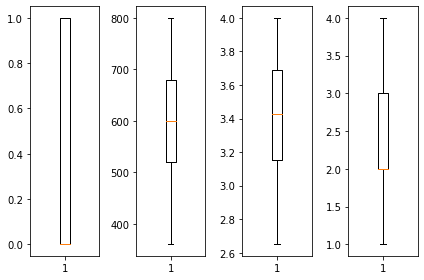

In [12]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn import linear_model
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# 1. Raw Data Loading
df = pd.read_csv('./data/admission.csv')

# 2. 결측치 확인
df.isnull().sum()
# 결측치는 없다.

# 3. 이상치를 확인해서 있으면 제거
# fig = plt.figure()
# fig_admin = fig.add_subplot(1, 4, 1)
# fig_gre = fig.add_subplot(1, 4, 2)
# fig_gpa = fig.add_subplot(1, 4, 3)
# fig_rank = fig.add_subplot(1, 4, 4)

# fig_admin.boxplot(df['admit'])
# fig_gre.boxplot(df['gre'])
# fig_gpa.boxplot(df['gpa'])
# fig_rank.boxplot(df['rank'])

# fig.tight_layout()
# plt.show()

print(df.shape)
zscore_threshold = 2.0

for col in df.columns:
    outliers = df[col][np.abs(stats.zscore(df[col])) > zscore_threshold]
    df = df.loc[~df[col].isin(outliers)]
    
print(df.shape)

# 이상치를 확인해서 있으면 제거
fig = plt.figure()
fig_admin = fig.add_subplot(1, 4, 1)
fig_gre = fig.add_subplot(1, 4, 2)
fig_gpa = fig.add_subplot(1, 4, 3)
fig_rank = fig.add_subplot(1, 4, 4)

fig_admin.boxplot(df['admit'])
fig_gre.boxplot(df['gre'])
fig_gpa.boxplot(df['gpa'])
fig_rank.boxplot(df['rank'])

fig.tight_layout()
plt.show() # 이상치 제거 됨

# 4. Training Data Set
# admin 빼고 세개를 training data로 쓴다, inplace=False -> 원본 삭제x
# values : dataframe의 값만 numpy화
x_data= df.drop('admit', axis=1, inplace=False).values
# df['amin']: Series, values: vector
# reshape(-1, 1): 2차원 matrix화 
t_data = df['admit'].values.reshape(-1, 1)

# 5. 정규화
scaler_x = MinMaxScaler()
scaler_x.fit(x_data)
norm_x_data = scaler_x.transform(x_data) # for python, tensorflow

### 1. sklearn을 이용한 구현

In [13]:
# sklearn을 이용한 구현
model = linear_model.LogisticRegression()
model.fit(x_data, t_data.ravel())

my_score = np.array([[600, 3.8, 1]])
predict_val = model.predict(my_score) # 0 or 1
predict_proba = model.predict_proba(my_score) # (불합격할 확률, 합격할 확률)

print('########### sklearn 결과값 ##############')
print('나의 지원정보 : {}, 결과: {}, {}'.format(my_score, predict_val, predict_proba))

########### sklearn 결과값 ##############
나의 지원정보 : [[600.    3.8   1. ]], 결과: [1], [[0.43740782 0.56259218]]


### 2. tensorflow을 이용한 구현

In [10]:
# tensorflow을 이용한 구현

# plceholder
# 행 미정, 열 3열 (독립변수 3개)
X = tf.placeholder(shape=[None, 3], dtype=tf.float32) # 독립변수의 데이터를 받기 위한 plcaholder
T = tf.placeholder(shape=[None, 1], dtype=tf.float32) # 종속변수 (label)의 데이터를 받기 위한 placeholder

# Weight & bias
W = tf.Variable(tf.random.normal([3,1]), name='weight')
b = tf.Variable(tf.random.normal([1]), name='bias')

# hypothesis
logit = tf.matmul(X, W) + b
H = tf.sigmoid(logit)

# loss function
loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=logit, labels=T))

# train
train = tf.train.GradientDescentOptimizer(learning_rate = 1e-4).minimize(loss)

# session & 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# 학습
for step in range(30000):
    _, W_val, b_val, loss_val = sess.run([train, W, b, loss],
                                         feed_dict={X:norm_x_data, T:t_data})
    
    if step % 3000 == 0:
        print('W : {}, b : {}, loss: {}'.format(W_val, b_val, loss_val))

my_score = np.array([[600, 3.8, 1]])
scaled_my_score = scaler_x.transform(my_score)
result = sess.run(H, feed_dict={X:scaled_my_score})

print('########### tensorflow 결과값 ##############')
print('나의 지원정보 : {}, 결과: {}'.format(my_score, result))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W : [[-1.1890466 ]
 [ 1.0526935 ]
 [ 0.20298532]], b : [-0.9008117], loss: 0.6500018239021301
W : [[-1.1773398 ]
 [ 1.0588218 ]
 [ 0.19310416]], b : [-0.8966231], loss: 0.6490359306335449
W : [[-1.1659471 ]
 [ 1.0645823 ]
 [ 0.18302959]], b : [-0.892958], loss: 0.6481098532676697
W : [[-1.1548606 ]
 [ 1.0700147 ]
 [ 0.17279172]], b : [-0.8897562], loss: 0.6472181677818298
W : [[-1.1440902 ]
 [ 1.0751681 ]
 [ 0.16241725]], b : [-0.88696694], loss: 0.6463566422462463
W : [[-1.1335225 ]
 [ 1.0801057 ]
 [ 0.15192787]], b : [-0.8845548], loss: 0.6455176472663879
W : [[-1.1231513 ]
 [ 1.0847548 ]
 [ 0.14135002]], b : [-0.8824785], loss: 0.6447002291679382
W : [[-1.1130643 ]
 [ 1.0892022 ]
 [ 0.13069385]], b : [-0.8806864], loss: 0.6439041495323181
W : [[-1.1030507 ]
 [ 1.0934937 ]
 [ 0.11998824]], b : [-0.87915826], loss: 0.6431209444999695
W : [[-1.0933387 ]
 [ 1.0975642 ]
 [ 0.10923773]], b : [-0.

### 정확도 측정

In [26]:
import numpy as np
import pandas as pd
import tensorflow as tf
from scipy import stats
from sklearn.preprocessing import MinMaxScaler

# 1. Raw Data Loading
df = pd.read_csv('./data/admission.csv')

# 2. 결측치 확인
print(df.isnull().sum()) # 결측치 없음

# 3. 이상치 제거
zscore_threshold = 2.0

for col in df.columns:
    outliers = df[col][np.abs(stats.zscore(df[col])) > zscore_threshold]
    df = df.loc[~df[col].isin(outliers)]
    
# 4. Training Data Set
x_data = df.drop('admit', axis=1, inplace=False).values
t_data = df['admit'].values.reshape(-1, 1)

# 5. hypothesis
logit = tf.matmul(X, W) + b
H = tf.sigmoid(logit)

# 6. loss function
loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=logit, labels=T))

# 7. train node
train = tf.train.GradientDescentOptimizer(learning_rate=1e-4).minimize(loss)

# 8. session & 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# 9. 학습
for step in range(30000):
    _, W_val, b_val, loss_val = sess.run([train, W, b, loss],
                                        feed_dict={X:norm_x_data, T:t_data})
    if step % 3000 == 0:
        print('W: {}, b: {}, loss: {}'.format(W_val, b_val, loss_val))
        
# 10. 정확도 (Accuracy) 측정
predict = tf.cast(H >= 0.5, dtype=tf.float32) # True => 1.0, False -> 0
correct = tf.equal(predict, T)
accuracy = tf.reduce_mean(tf.cast(correct, dtype=tf.float32))

# 11. prediction
my_score = np.array([[600, 3.8, 1]])
scaled_my_score = scaler_x.transform(my_score)

result = sess.run(H, feed_dict={X:scaled_my_score})
print('####### tensorflow 결과값 #########')
print('내 지원정보 : {}, 결과 : {}'.format(my_score,result)) 

admit    0
gre      0
gpa      0
rank     0
dtype: int64
W: [[ 0.93438536]
 [ 0.44834182]
 [-0.37441477]], b: [-1.961393], loss: 0.6361476182937622
W: [[ 0.95522255]
 [ 0.47153884]
 [-0.36583152]], b: [-1.9277273], loss: 0.6288771033287048
W: [[ 0.97424644]
 [ 0.49282712]
 [-0.3586862 ]], b: [-1.8970697], loss: 0.6228521466255188
W: [[ 0.99157554]
 [ 0.5123314 ]
 [-0.3528846 ]], b: [-1.8692309], loss: 0.6178829073905945
W: [[ 1.0073327 ]
 [ 0.53018177]
 [-0.34832877]], b: [-1.8440022], loss: 0.6137986183166504
W: [[ 1.021644 ]
 [ 0.5465024]
 [-0.3449212]], b: [-1.8211789], loss: 0.6104500889778137
W: [[ 1.034637  ]
 [ 0.56142265]
 [-0.34256384]], b: [-1.8005706], loss: 0.607708752155304
W: [[ 1.0464036 ]
 [ 0.5750613 ]
 [-0.34116307]], b: [-1.7819772], loss: 0.6054659485816956
W: [[ 1.057076  ]
 [ 0.58753645]
 [-0.3406295 ]], b: [-1.7652164], loss: 0.6036287546157837
W: [[ 1.0667409 ]
 [ 0.5989521 ]
 [-0.34087968]], b: [-1.7501303], loss: 0.6021220088005066
####### tensorflow 결과값 #####

![image.img](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FvTHbU%2FbtqJQHWomPI%2FaJAtsP4YfcgkJehkcJYoK0%2Fimg.png)